## STEG 1: DATAINSAMLING 

**Uppgift**: Ladda in data och beskriv den

In [75]:
# TODO: Importera pandas
# hej från ny branch
import pandas as pd

# TODO: Ladda in data från CSV-fil
df = pd.read_csv("../data/Metro_Interstate_Traffic_Volume.csv")

# TODO: Visa första 5 raderna


# TODO: Visa antal rader och kolumner


# TODO: Lista alla kolumner


In [76]:
# TODO: Visa första 5 raderna
df.head()



,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [77]:
# TODO: Visa antal rader och kolumner
df.shape

(48204, 9)

In [78]:
# TODO: Lista alla kolumner
list(df.columns)

['traffic_volume',
 'holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time']

**Förklaring**: [Beskriv kort vilken data ni har och vad kolumnerna betyder] 

---

Datan består av väderinformation och luftföroreningsnivåer, och varje rad representerar en timmes mätning. och kolumnen ser man på övre delan och vad det är.

## STEG 2: DATARENSNING 

**Uppgift**: Verifiera att data är OK

In [79]:
print("Saknade värden per kolumn")
display(df.isna().sum())  # isna().sum() räknar hur många NaN finns det i varje kolumn



Saknade värden per kolumn


traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64

In [80]:
print("Antal dubbletter (hela rader som är kopior):", 
df.duplicated().sum())
dups = df[df.duplicated()]


Antal dubbletter (hela rader som är kopior): 17


In [81]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


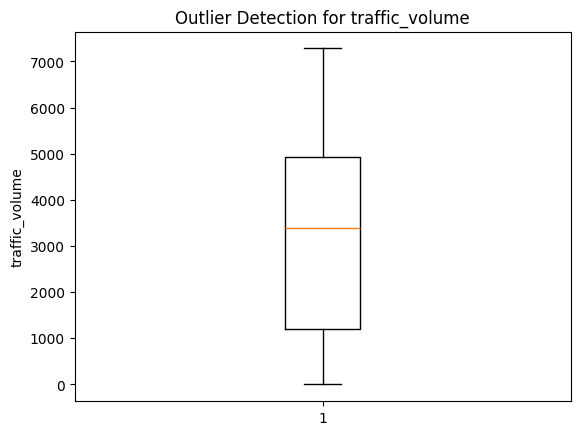

In [82]:
# TODO: Kolla efter saknade värden
df.isnull().sum()


# TODO: Kolla efter duplikater
df.duplicated().sum()

# TODO: Visa statistik för numeriska kolumner
df.describe()

# TODO: Kolla efter outliers (extremvärden)
import matplotlib.pyplot as plt

plt.boxplot(df["traffic_volume"])
plt.title("Outlier Detection for traffic_volume")
plt.ylabel("traffic_volume")
plt.show()


**Slutsats**: [Är datan OK? Finns det problem?]

---

datan är bra skick men det finns endas saknade värden och det är kolmnunen is_holiday, och vi tog bort den för den har inga värde men dom övriga kolumnen är kompletta.

## STEG 3: DATAANALYS 

**Uppgift**: Välj 2 analyser med grafer

### ANALYS 1: [fördelning av trafik volymen]

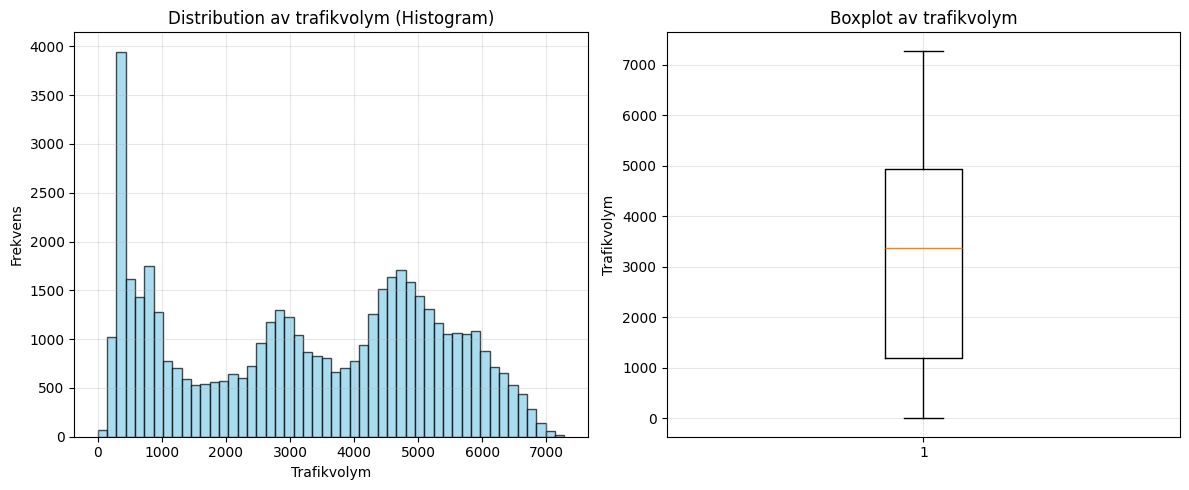

Statistik för trafikvolymen:
count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Median: 3380.0
Modus (mest vanligt värde): 353


In [83]:
import matplotlib.pyplot as plt

# Analys 1: Distribution av trafikvolymen
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['traffic_volume'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Trafikvolym")
plt.ylabel("Frekvens")
plt.title("Distribution av trafikvolym (Histogram)")
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['traffic_volume'], vert=True)
plt.ylabel("Trafikvolym")
plt.title("Boxplot av trafikvolym")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visa statistik
print("Statistik för trafikvolymen:")
print(df['traffic_volume'].describe())
print(f"\nMedian: {df['traffic_volume'].median()}")
print(f"Modus (mest vanligt värde): {df['traffic_volume'].mode().values[0]}")


**Resultat**: [Vad ser ni i grafen? 2-3 meningar]

---

Trafikvolymen visar en ganska jämn fördelning med två toppar — en runt låga värden (nattetimmar med låg trafik) och en större topp omkring 4000-5000 fordon (rusningsperioder och dagtimmar). Medianen ligger runt 3500-4000, vilket visar att trafiken varierar betydligt beroende på tid och väderförhållanden.

In [84]:
df['date_time'] = pd.to_datetime(df['date_time'], format='mixed', dayfirst=True)
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

### ANALYS 2: [Traffic variation per timme på dygnet]

**Fråga**: [Vad vill ni ta reda på?]


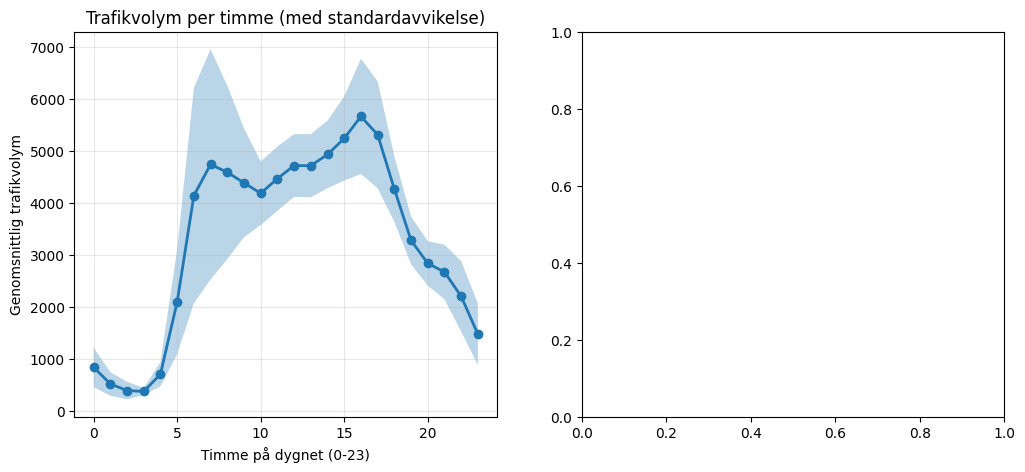

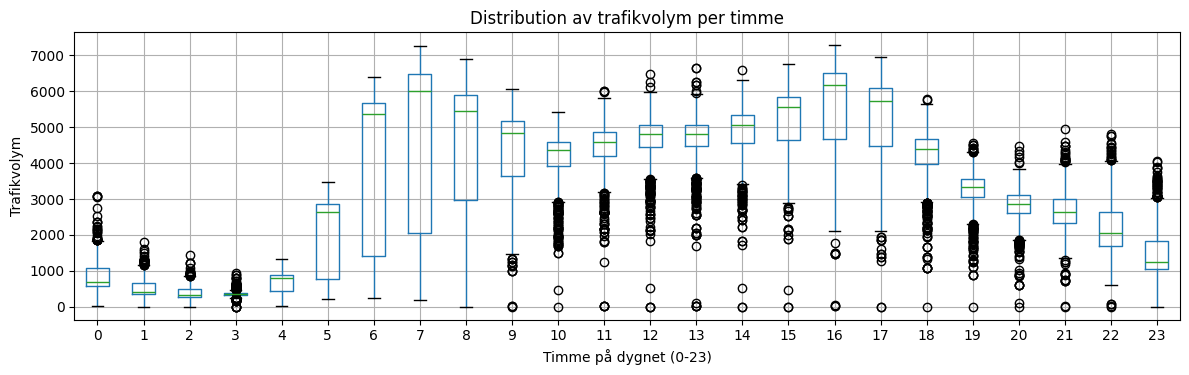


Gemomsnittlig trafikvolym per timme:
             mean          std  count
hour                                 
0      834.781051   380.958191   2037
1      516.449000   227.104609   2049
2      388.353640   168.196955   2019
3      371.090864    67.188107   2025
4      702.551889   233.880132   2091
5     2094.573437  1008.377374   2063
6     4140.503594  2073.217328   2087
7     4740.181337  2215.390808   2079
8     4587.497115  1669.276403   2080
9     4385.277502  1048.461243   2018
10    4184.665544   611.840609   2078
11    4465.877561   618.265260   1952
12    4718.293095   603.470126   1955
13    4714.940682   607.290702   1905
14    4931.888776   650.446479   1969
15    5240.524302   810.848845   1934
16    5663.756539  1108.986769   1988
17    5310.076048  1028.290587   1933
18    4263.718530   630.712498   1986
19    3276.394187   458.083205   1961
20    2834.667509   427.486795   1979
21    2668.940464   526.087066   1982
22    2199.405717   677.502006   1994
23    1469.1

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analys 2: Hur varierar trafikvolymen per timme på dygnet?
hourly_traffic = df.groupby('hour')['traffic_volume'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(12, 5))

# Subplot 1: Genomsnittlig trafikvolym per timme
plt.subplot(1, 2, 1)
plt.plot(hourly_traffic.index, hourly_traffic['mean'], marker='o', linewidth=2)
plt.fill_between(hourly_traffic.index, 
                  hourly_traffic['mean'] - hourly_traffic['std'], 
                  hourly_traffic['mean'] + hourly_traffic['std'], 
                  alpha=0.3)
plt.xlabel("Timme på dygnet (0-23)")
plt.ylabel("Genomsnittlig trafikvolym")
plt.title("Trafikvolym per timme (med standardavvikelse)")
plt.grid(True, alpha=0.3)

# Subplot 2: Boxplot för trafikvolym per timme
plt.subplot(1, 2, 2)
df.boxplot(column='traffic_volume', by='hour', figsize=(12, 4))
plt.xlabel("Timme på dygnet (0-23)")
plt.ylabel("Trafikvolym")
plt.title("Distribution av trafikvolym per timme")
plt.suptitle("")  # Ta bort automatisk titel från boxplot

plt.tight_layout()
plt.show()

print("\nGemomsnittlig trafikvolym per timme:")
print(hourly_traffic)


**Resultat**: [Vad ser ni? 2-3 meningar]

---

## STEG 4: PREDIKTIV MODELL 

**Uppgift**: Bygg en modell som förutsäger energiförbrukning

### 4.1 Välj Features

**Förklaring**: [Vilka features valde ni och VARFÖR?]

In [86]:
#vi har valt 3 features för att predicera traffic volume, hour,temp,clouds_all för att de har mest påverkan på traffic volume.

In [87]:
# TODO: Importera sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# TODO: Välj features (X) och target (Y)
X = df[["hour","temp","clouds_all"]] 
Y = df["traffic_volume"]

# TODO: Dela data i träning och test (80/20)
x_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


### 4.2 Bygg och träna modellen

In [88]:
# TODO: Skapa modellen
model = LinearRegression()

# TODO: Träna modellen
model.fit(x_train, Y_train)

# TODO: Gör prediktioner på testdata
Y_pred = model.predict(X_test)


### 4.3 Utvärdera modellen

R² score: 0.14091482796125143
Mean Absolute Error: 1634.3894684824159


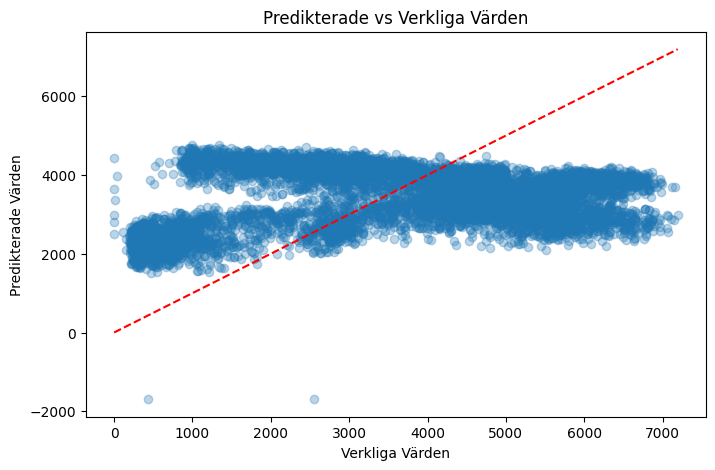

In [89]:
# TODO: Beräkna R² score
r2 = r2_score(Y_test, Y_pred)
print("R² score:", r2)


# TODO: Beräkna MAE (Mean Absolute Error)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# TODO: Skapa en graf som visar prediktioner vs verkliga värden
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Verkliga Värden")
plt.ylabel("Predikterade Värden")
plt.title("Predikterade vs Verkliga Värden")
plt.show()



JÄMFÖRELSE: Linear Regression vs Random Forest
Linear Regression - R² score: 0.1409, MAE: 1634.39
Random Forest     - R² score: 0.7817, MAE: 558.35



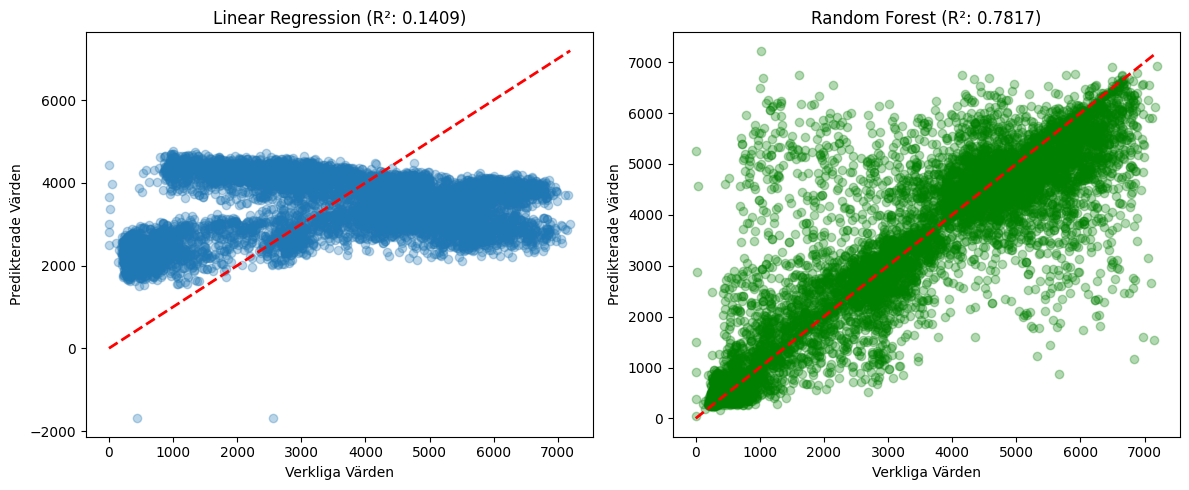

Feature Importance (Random Forest):
      feature  importance
0        hour    0.788082
1        temp    0.179045
2  clouds_all    0.032873


In [90]:

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Skapa och träna Random Forest modellen
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(x_train, Y_train)

# Gör prediktioner
Y_pred_rf = rf_model.predict(X_test)

# Beräkna mätvärden för Random Forest
r2_rf = r2_score(Y_test, Y_pred_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)

print("\n" + "="*60)
print("JÄMFÖRELSE: Linear Regression vs Random Forest")
print("="*60)
print(f"Linear Regression - R² score: {r2:.4f}, MAE: {mae:.2f}")
print(f"Random Forest     - R² score: {r2_rf:.4f}, MAE: {mae_rf:.2f}")
print("="*60 + "\n")

# Visualisera Random Forest prediktioner
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.xlabel("Verkliga Värden")
plt.ylabel("Predikterade Värden")
plt.title(f"Linear Regression (R²: {r2:.4f})")

plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_rf, alpha=0.3, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.xlabel("Verkliga Värden")
plt.ylabel("Predikterade Värden")
plt.title(f"Random Forest (R²: {r2_rf:.4f})")

plt.tight_layout()
plt.show()

# Feature importance för Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance.to_string())


**Resultat**: 
- R² linear Score: [0,14]
- R² random forest Score: [0,78]
- MAE: [Ditt värde här]

**Diskussion**: [Är modellen bra eller dålig? Varför? 3-5 meningar]
om man jämör linjär regression och random forest regression så är det väldig stor skillnad.
linjär regression har R2 0.14 vilket är väldigt dåligt, modellen lär sig inästan 
ingenting, R2 0.14 innebär att modellen förklarar bara 14% av variationen i data baserat på de valda featuren.
där med  så ger random forest regression mycket bättre resultat med R2 0.78 vilket är mycket bra modell.
det finns inga samband mellan temprature och air pollution index.

---

## STEG 5: REKOMMENDATIONER - VG uppgift

Baserat på era analyser, ge  **1 konkret rekommendation**.